In [ ]:
import pandas as pd
import numpy as np

#Connecting to the Google Drive.
from google.colab import drive
drive.mount('/content/drive')

#Reading the data.
url = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
df=pd.read_csv(url)

Mounted at /content/drive


**Computing for Polynomial Kernel Matrix d = 2**

In [ ]:
def KernelMatrix(d):
  kernel_mat = []
  for i in range(len(df)):
    ker = []
    for j in range(len(df)):
      val=0
      for k  in range(df.shape[1]):
        val = val+df.iloc[i][k] * df.iloc[j][k]
      val=val+1
      val=val**d
      ker.append(val)
    kernel_mat.append(ker)
  kernel = pd.DataFrame(kernel_mat)
  return kernel

**Centralize the Kernel Matrix !!**


```
Center the kernel matrix via the following trick:
Kcentered=K−1nK−K1n+1nK1n=(I−1n)K(I−1n),
where 1n is a n×n matrix with all elements equal to 1/n, and n is the number of data points.
```




In [ ]:
#Function to compute Matrix Multiplication
def MatrixMul(A,p,q,B,r):
  R = []
  for i in range(p):
    R11 = []
    for j in range(r):
      num = 0
      for k in range(q):
        num = num + A[i][k]* B[k][j]
      R11.append(num)
    R.append(R11)
  return R

In [ ]:
## Computing the Identity Matrix.
def IdentityMatrix(n):
  I = []
  for i in range(n):
    I_n = []
    for j in range(n):
      if i == j:
        I_n.append(1)
      else:
        I_n.append(0)
    I.append(I_n)
  return I
## Computing the Indicator Matrix
def IndicatorMatrix(n):
  num  = 1 / len(df)
  In = []
  for i in range(len(df)):
    In1 = []
    for j in range(len(df)):
      In1.append(num)
    In.append(In1)
  return In
#Computing I1 = (I-In)
def SubtractMatrix(I,n,In):
  I1 = []
  for i in range(n):
    I11 = []
    for j in range(n):
      I11.append(I[i][j] - In[i][j])
    I1.append(I11)
  return I1


In [ ]:
d = 2
kernel = KernelMatrix(d)
I = IdentityMatrix(len(df))
In = IndicatorMatrix(len(df))
I1 = SubtractMatrix(I , len(df),In)
I1 = np.array(I1)
#Computing I2 = I1*K
I2 =  np.matmul(I1,kernel)
#Computing Centered Kernel Matrix
kernel_c = np.matmul(I2,I1)
kernel_c = pd.DataFrame(kernel_c)

**Computing the Eigen Values & Eigen Vectors of the Centered Kernel Matrix**

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(kernel_c)

In [ ]:
#Sorting the Eigen vectors in decresing order of the corresponding Eigen Valules.
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
eigenvalues=eigenvalues[0:2]
eigenvectors=eigenvectors[:,0:2]

In [ ]:
import math
EV1 = eigenvectors[:,0]
EV2 = eigenvectors[:,1]
value1 = eigenvalues[0]
value2 = eigenvalues[1]

# Normalising the Eigen Vectors
for i in range(len(EV1)):
  EV1[i] = EV1[i]/np.sqrt(value1)
  EV2[i] = EV2[i]/np.sqrt(value2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Project of Top 2 Components on Poly. Kernel Matrix')

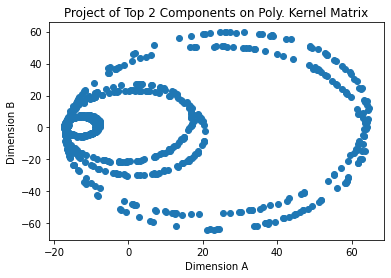

In [ ]:
#Calculating the projected Data points as Kernel Matrix x Eigen Vector.
P1 = np.matmul(np.transpose(kernel_c), EV1)
P2 = np.matmul(np.transpose(kernel_c), EV2)
import matplotlib.pyplot as plt
plt.scatter(P1,P2)
plt.xlabel('Dimension A')
plt.ylabel('Dimension B')
plt.title('Project of Top 2 Components on Poly. Kernel Matrix')

**Computing the Polynomial Kernel Matrix for d = 3.**

In [ ]:
d = 3
kernel1 = KernelMatrix(d)
kernel1
##Centralise the Kernel Matrix
# I -> Identity Matrix
I = IdentityMatrix(len(kernel1))
# In -> Indicator Matrix
In = IndicatorMatrix(len(kernel1))
#I1 = I - In
I1 = SubtractMatrix(I,len(kernel1),In)
I1 = np.array(I1)
# I2 -> (I - In) x kernel1
I2 = np.matmul(I1,kernel1)
kernel_c = np.matmul(I2,I1)

In [ ]:
#Computing Eigen Values
eigenvalues, eigenvectors = np.linalg.eig(kernel_c)

In [ ]:
#Sorting the Eigen vectors in decresing order of the corresponding Eigen Valules.
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
eigenvalues=eigenvalues[0:2]
eigenvectors=eigenvectors[:,0:2]

In [ ]:
import math
EV1=eigenvectors[:,0]
EV2=eigenvectors[:,1]
value1=eigenvalues[0]
value2=eigenvalues[1]

# Normalising the Eigen Vectors
for i in range(len(EV1)):
  EV1[i] = EV1[i]/np.sqrt(value1)
  EV2[i] =EV2[i]/np.sqrt(value2)

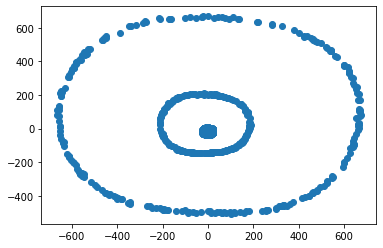

In [ ]:
#Calculating the projected Data points as Kernel Matrix x Eigen Vector.
P1 = np.matmul(np.transpose(kernel_c), EV1)
P2 = np.matmul(np.transpose(kernel_c), EV2)
import matplotlib.pyplot as plt
plt.scatter(P1,P2)
plt.xlabel('Dimension A')
plt.ylabel('Dimension B')
plt.title('Project of Top 2 Components on Poly. Kernel Matrix')

**Computing the Exponential Kernel Matrix.**

In [ ]:
def Exponential_Kernel(sigma):
  kernel_ex = []
  for i in range(len(df)):
    ex1 = []
    for j in range(len(df)):
      a, b = df.iloc[i], df.iloc[j]
      X = np.subtract(a,b)
      X_T = np.transpose(X)
      num = np.dot(X,X_T)
      den = 2 * sigma * sigma
      ex1.append(num/den)
    kernel_ex.append(ex1)
  kernel_ex = np.array(kernel_ex)
  kernel_ex = np.negative(kernel_ex)
  kernel_ex = np.exp(kernel_ex)
  return kernel_ex


In [ ]:
#Centering the kernel.
def kernel_Centering(kernel_ex):
  I = IdentityMatrix(len(kernel_ex))
  # In -> Indicator Matrix
  In = IndicatorMatrix(len(kernel_ex))

  #I1 = I - In
  I1 = np.subtract(I,In)
  I2 = np.matmul(I1, kernel_ex)
  # kernel_ex = (I - In) x kernel1 x (I - In)
  kernel_ex = np.matmul(I2, I1)
  return kernel_ex

In [ ]:
#Sorting the Eigen vectors in decresing order of the corresponding Eigen Valules.
def ComputeEigens(kernel_ex):
  eigenvalues, eigenvectors = np.linalg.eig(kernel_ex)
  idx = eigenvalues.argsort()[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:,idx]
  eigenvalues=eigenvalues[0:2]
  eigenvectors=eigenvectors[:,0:2]

  Value1 = eigenvalues[0]
  Value2 = eigenvalues[1]
  EV1 = eigenvectors[:,0]
  EV2 = eigenvectors[:,1]
  for i in range(len(EV1)):
    EV1[i] = np.multiply(EV1[i], 1 / Value1)
    EV2[i] = np.multiply(EV2[i], 1 / Value2)
  return EV1,EV2

In [ ]:
#Calculating the projected Data points as Kernel Matrix x Eigen Vector.
def PlotGraph(EV1, EV2 , kernel_ex):
  P1 = np.matmul(np.transpose(kernel_ex), EV1)
  P2 = np.matmul(np.transpose(kernel_ex), EV2)
  import matplotlib.pyplot as plt
  plt.scatter(P1,P2)
  plt.xlabel('Dimension A')
  plt.ylabel('Dimension B')
  plt.title('Projection of Datapoints on Top 2 Principal Components of Exponential Kernel')

Exponential Kernel for sigma = 0.1

In [ ]:
sigma = 0.1
kernel_ex = Exponential_Kernel(sigma)

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.1


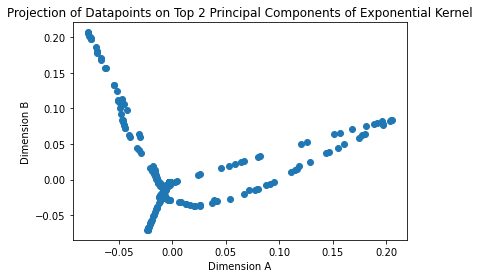

In [ ]:
# print(kernel_ex)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.1')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.2

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.2


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


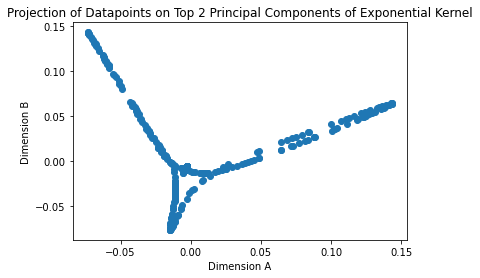

In [ ]:
sigma = 0.2
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.2')
PlotGraph(EV1,EV2,kernel_ex)

**Exponential Kernel for sigma = 0.3**

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.3


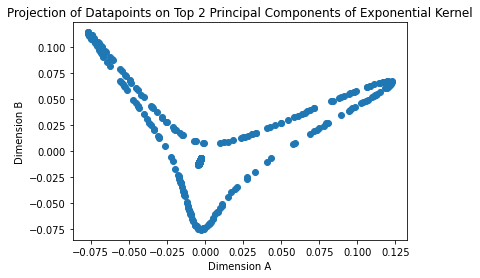

In [ ]:
sigma = 0.3
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.3')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.4

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.4


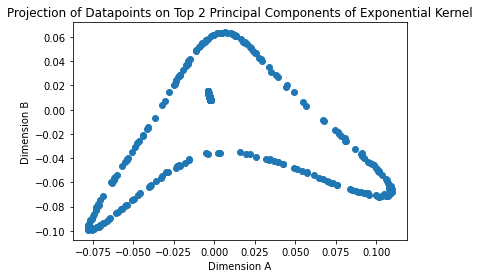

In [ ]:
sigma = 0.4
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.4')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.5

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.5


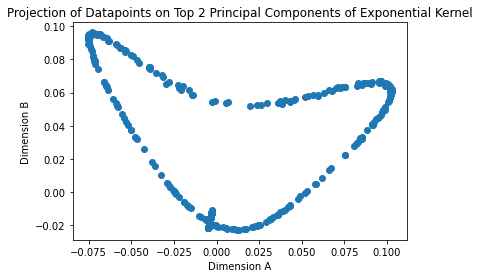

In [ ]:
sigma = 0.5
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.5')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.6

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.6


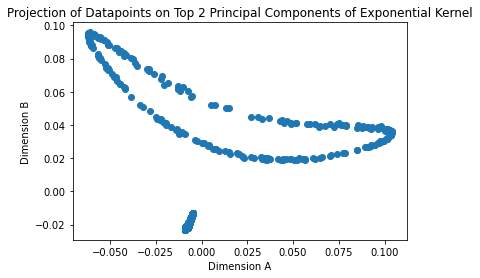

In [ ]:
sigma = 0.6
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.6')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.7

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.7


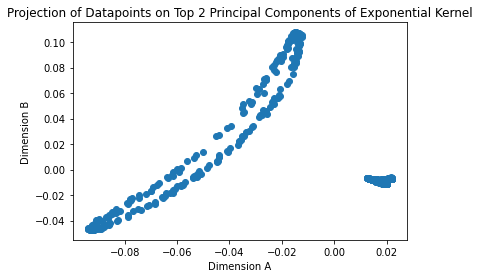

In [ ]:
sigma = 0.7
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.7')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.8

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.8


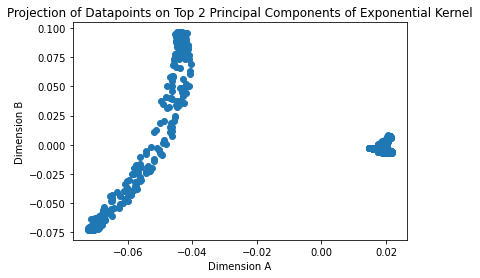

In [ ]:
sigma = 0.8
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.8')
PlotGraph(EV1,EV2,kernel_ex)

Exponential Kernel for sigma = 0.9

Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.9


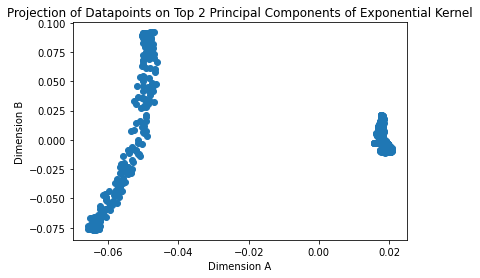

In [ ]:
sigma = 0.9
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 0.9')
PlotGraph(EV1,EV2,kernel_ex)

In [ ]:
sigma = 1
kernel_ex = Exponential_Kernel(sigma)
kernel_ex = kernel_Centering(kernel_ex)
EV1 , EV2 = ComputeEigens(kernel_ex)
print('Projecting on the Top 2 Principal Components of Exponential Kernel Matrix, sigma = 1')
PlotGraph(EV1,EV2,kernel_ex)